In [6]:
# importing required modules
import numpy as np
import pandas as pd
import string
import os
import re
import operator as op
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from matplotlib import pyplot as plt

In [7]:
#get the list of classes from the list directory in 20_newsgroup dataset
list_of_categories = os.listdir('./20_newsgroups')


In [8]:
# get the list of stopwords from a file which has already been saved
stop_file = open('stopwords_en.txt','r')
stop_words = stop_file.read().split('\n')

In [9]:
dictionary={}      # dictionary to store words with their frequency

for folder in list_of_categories :
    files = os.listdir('./20_newsgroups/'+folder)  # accessing inner folders in all types of news
    for file in files:
        f = open('./20_newsgroups/'+folder+'/'+file,'r')   # accessing files in inner folders
        textfile = f.read()
        tokens = re.compile('\w+').findall(textfile)      # making object of re
        
        for token in tokens:
            if(token.isalpha() and len(token)>2 and token.lower() not in stop_words):
                if(token.lower() not in dictionary.keys()):
                    dictionary[token.lower()] = 1
                else:
                    dictionary[token.lower()]+=1
listoftuples = sorted(dictionary.items(),key=op.itemgetter(1),reverse=True)    # sorted on basis of value in decreasing order

In [10]:
final_vocab_list = listoftuples[:1000] # top 1000 words chosen
final_vocab = {}
#making a dictionary containing only top 1000 words
for t in final_vocab_list:
    final_vocab[t[0]] = t[1]

In [11]:
# storing these values of dictionary in a file named vocab_file
fp = open('vocab_file','w')
for item in final_vocab.items():
    fp.write(str(item)+'\n')
    

In [14]:
# making the header of the dataframe that we are going to use ahead
# we store this dataframe in file as well
df=pd.DataFrame()
for feature in final_vocab.keys():
    df[feature] = 0
df['target'] = 0
df.to_csv('df_file.csv')

In [15]:
# constructing our feature table
# we store it in our dataframe df
for folder in list_of_categories:
    files = os.listdir('./20_newsgroups/'+folder)
    for file in files:
        words = []
        count = 0
        current_count = 0
        f=open('./20_newsgroups/'+folder+'/'+file,'r')
        textfile = f.read()
        tokens = re.compile('\w+').findall(textfile)
        
        for token in tokens:
            if(token.isalpha() and len(token)>2 and token.lower() not in stop_words):
                words.append(token.lower())                     # words appended in words list as many times as they occur
                
        row=[]
        for feature in final_vocab.keys():
            for word in words:
                if(feature == word):
                    count += 1
                    
            row.append(count)  # appending count of each word in row
            count = 0
            
        row.append(folder)  # adding type of news group at the end
        df.loc[len(df)] = row   # appending in the dataframe


In [16]:
# saving this feature table in our file to access it later without doing the whole work again
df.to_csv('feature_table.csv')


Now we will access the data from the files that we have stored after filtering the data.
We first try inbuilt MultinomialNb.

In [17]:
# access x and y values
X = df.iloc[:,:df.shape[1]-1].values
Y = df.iloc[:,-1].values
xtrain,xtest,ytrain,ytest = train_test_split(X,Y)

In [18]:
clf=MultinomialNB()
clf.fit(xtrain,ytrain)
ypred1 = clf.predict(xtest)

In [19]:
print(classification_report(ytest,ypred1))
print(confusion_matrix(ytest,ytest))

                          precision    recall  f1-score   support

             alt.atheism       0.81      0.79      0.80       271
           comp.graphics       0.87      0.73      0.79       213
 comp.os.ms-windows.misc       0.83      0.78      0.81       249
comp.sys.ibm.pc.hardware       0.79      0.84      0.81       251
   comp.sys.mac.hardware       0.82      0.89      0.85       253
          comp.windows.x       0.85      0.81      0.83       235
            misc.forsale       0.87      0.93      0.90       274
               rec.autos       0.89      0.92      0.91       230
         rec.motorcycles       0.91      0.94      0.92       227
      rec.sport.baseball       0.92      0.92      0.92       236
        rec.sport.hockey       0.92      0.95      0.93       276
               sci.crypt       0.96      0.94      0.95       252
         sci.electronics       0.82      0.90      0.86       262
                 sci.med       0.94      0.90      0.92       260
         

In [20]:
print(accuracy_score(ytest,ypred1))

0.8608


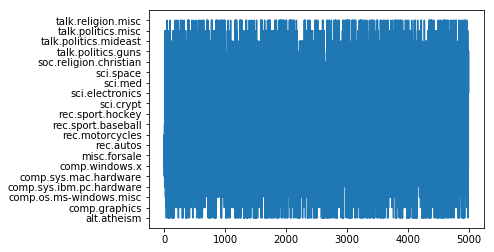

In [21]:
plt.plot(ypred1)
plt.show()

Now we can move on to the next section in which we make predictions on Mini newsgroups after training our data using the 20 newsgroups. We had stored the trained data in a file. We can now directly access it to continue further.

In [22]:
# get feature table
df = pd.read_csv('feature_table.csv')
dictionary = {}
# get words that have been used in the feature table

fp = open('vocab_file','r+')
l = fp.readlines()


In [23]:
# creatre a dictionary containing (word, frequency) pairs using the data read above from vocab_file
key=""
value=-1
for s in l:
    ts=s.strip().split(',')
    for i in ts:
        templist=[letter for letter in i if letter not in string.punctuation]
        tempstring=''.join(templist).strip()
        if(tempstring.isalpha()):
            dictionary[tempstring]=value
            key=tempstring
        elif(tempstring.isnumeric()):
            dictionary[key]=int(tempstring)
            

In [24]:
# get all classes 
ls = os.listdir('./mini_newsgroups/')
dft = pd.DataFrame()          # test data frame
for feature in dictionary.keys():
    dft[feature] = 0
dft['target'] = 0
fsw = open('stopwords_en.txt','r')
stop_words=fsw.read().split('\n')

In [25]:
# test data
# same as done before but now on mini newsgroups
for folder in ls:
    files=os.listdir('./mini_newsgroups/'+folder)
    for file in files:
        words = []
        count = 0
        current_count = 0
        f = open('./mini_newsgroups/'+folder+'/'+file,'r')
        textfile = f.read()
        tokens = re.compile('\w+').findall(textfile)
        
        for token in tokens:
            if(token.isalpha() and len(token)>2 and token.lower() not in stop_words):
                words.append(token.lower())
                
        row = []
        for feature in dictionary.keys():
            for word in words:
                if(feature == word):
                    count += 1
                    
            row.append(count)
            count = 0
            
        row.append(folder)
        dft.loc[len(dft)] = row


In [26]:
# save testing dataframe in a file
dft.to_csv('testing_data_frame.csv')
del df['Unnamed: 0']

In [27]:
xtrain = df.iloc[:,:df.shape[1]-1]
ytrain = df.iloc[:,-1]
xtest = dft.iloc[:,:dft.shape[1]-1]
ytest = dft.iloc[:,-1]

In [28]:
clf=MultinomialNB()
clf.fit(xtrain,ytrain)
ypred2 = clf.predict(xtest)
print(accuracy_score(ytest,ypred2))

0.886


In [29]:
print(classification_report(ytest,ypred2))
print(confusion_matrix(ytest,ytest))

                          precision    recall  f1-score   support

             alt.atheism       0.80      0.83      0.81       100
           comp.graphics       0.91      0.79      0.84       100
 comp.os.ms-windows.misc       0.89      0.85      0.87       100
comp.sys.ibm.pc.hardware       0.81      0.91      0.86       100
   comp.sys.mac.hardware       0.87      0.91      0.89       100
          comp.windows.x       0.90      0.86      0.88       100
            misc.forsale       0.92      0.98      0.95       100
               rec.autos       0.91      0.92      0.92       100
         rec.motorcycles       0.93      0.98      0.96       100
      rec.sport.baseball       0.93      0.94      0.94       100
        rec.sport.hockey       0.94      0.92      0.93       100
               sci.crypt       0.99      0.95      0.97       100
         sci.electronics       0.87      0.90      0.89       100
                 sci.med       0.93      0.92      0.92       100
         

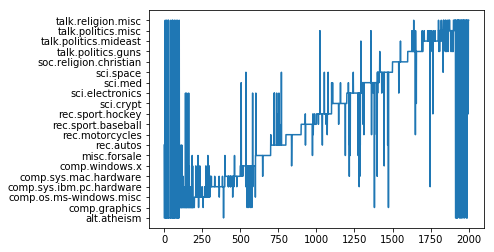

In [30]:
plt.plot(ypred2)
plt.show()

Now we will code our own naive bayes and predict results using these

In [31]:
# same process as done above
df = pd.read_csv('feature_table.csv') # read training and testing data
dftest = pd.read_csv('testing_data_frame.csv')
dictionary={}
fp = open('vocab_file','r+')
l = fp.readlines()

In [32]:
key=""
value=-1
for s in l:
    ts=s.strip().split(',')
    for i in ts:
        templist=[letter for letter in i if letter not in string.punctuation]
        tempstring=''.join(templist).strip()
        if(tempstring.isalpha()):
            dictionary[tempstring]=value
            key=tempstring
        elif(tempstring.isnumeric()):
            dictionary[key]=int(tempstring)
            
        

In [33]:
del df['Unnamed: 0']
del dftest['Unnamed: 0']
no_of_words=len(dictionary)
# get data 
xtrain = df.iloc[:,:df.shape[1]-1]
ytrain = df.iloc[:,-1]
xtest = dftest.iloc[:,:dftest.shape[1]-1]
ytest = dftest.iloc[:,-1]

In [34]:
# fit function 
def fit(x_train,y_train):
    result={}
    classes=set(y_train)
    result['total_docs']=x_train.shape[0]

    for current_class in classes:
        result[current_class] = {}
        current_class_rows = (current_class==y_train)
        x_train_current = x_train[current_class_rows]
        y_train_current = y_train[current_class_rows]     
        result[current_class]['no_of_docs'] = x_train_current.shape[0]
        num_features = x_train_current.shape[1]
        total_words_in_current_class = 0
        for j in range(num_features):
            freq_of_a_word_in_current_class = x_train_current.iloc[:,j].sum()
            result[current_class][j] = freq_of_a_word_in_current_class
            total_words_in_current_class += freq_of_a_word_in_current_class
            
        result[current_class]['total_words_in_class'] = total_words_in_current_class
    return result 

In [35]:
def probability(dictionary_count,x,current_class):
    p_y_equals_c = np.log(dictionary_count[current_class]['no_of_docs'])-np.log(dictionary_count['total_docs'])
    p_wi_in_doc = dictionary=0
    rangeloop = len(dictionary_count[current_class].keys())-2
    for i in range(rangeloop):
        wi = x[i]
        if(wi == 0):
            probrv = 0
        else:
            num = (dictionary_count[current_class][i] + 1)
            den = dictionary_count[current_class]['total_words_in_class'] + rangeloop
            probrv = np.log(num)-np.log(den)
        
        p_wi_in_doc += probrv     
    return p_wi_in_doc+p_y_equals_c


In [36]:
def predictSinglePoint(dictionary_count,x):
    classes = dictionary_count.keys()
    best_p = -1000
    best_class=''
    fr = True
    for current_class in classes:
        if(current_class == 'total_docs'):
            continue
        p = probability(dictionary_count,x,current_class)
        if(fr or p>best_p):
            best_p = p
            best_class = current_class
        fr = False
        
    return best_class

In [37]:
# predict function
def predict(dictionary_count,x_test_data):
    ypredrv = []
    for i in range(x_test_data.shape[0]):
        x = x_test_data.iloc[i]
        x_class = predictSinglePoint(dictionary_count,x)
        ypredrv.append(x_class)
    return ypredrv

In [38]:
dictionary_count = fit(xtrain,ytrain)
ypred3 = predict(dictionary_count,xtest)


In [39]:
print(accuracy_score(ytest,ypred3))

0.8885


In [40]:
print(classification_report(ytest,ypred3))
print(confusion_matrix(ytest,ytest))

                          precision    recall  f1-score   support

             alt.atheism       0.74      0.87      0.80       100
           comp.graphics       0.90      0.77      0.83       100
 comp.os.ms-windows.misc       0.91      0.81      0.86       100
comp.sys.ibm.pc.hardware       0.86      0.90      0.88       100
   comp.sys.mac.hardware       0.88      0.96      0.92       100
          comp.windows.x       0.87      0.86      0.86       100
            misc.forsale       0.95      0.97      0.96       100
               rec.autos       0.97      0.95      0.96       100
         rec.motorcycles       0.96      0.98      0.97       100
      rec.sport.baseball       0.98      0.98      0.98       100
        rec.sport.hockey       0.98      0.98      0.98       100
               sci.crypt       0.98      0.94      0.96       100
         sci.electronics       0.77      0.98      0.86       100
                 sci.med       0.91      0.96      0.94       100
         

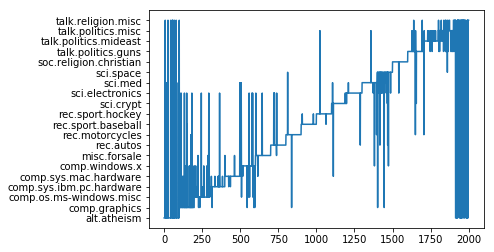

In [41]:
plt.plot(ypred3)
plt.show()